<img src="agri_image2.png" alt="Sample Image" width="900" height="200">

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler   
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

In [45]:
#Importing the data
df = pd.read_csv("co2_emissions_from_agri.csv")
#Show preview of data
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

In [46]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

C:\Users\nb177106\AppData\Local\Temp\ipykernel_17792\1698212665.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\nb177106\AppData\Local\Temp\ipykernel_17792\1698212665.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [47]:
# Convert year to integer
df['year'] = df['year'].astype(int)

# Convert population columns to integer
population_columns = ['rural_population', 'urban_population', 'total_population_-_male', 'total_population_-_female']
for column in population_columns:
    df[column] = df[column].astype(int)


In [48]:
# Ensure each row is a unique country-year observation
df.drop_duplicates(subset=['area', 'year'], inplace=True)

In [49]:
# Fill missing values: 0 for numeric columns, 'Unknown' for object (text) columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')
    else:
        df[column] = df[column].fillna(0)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

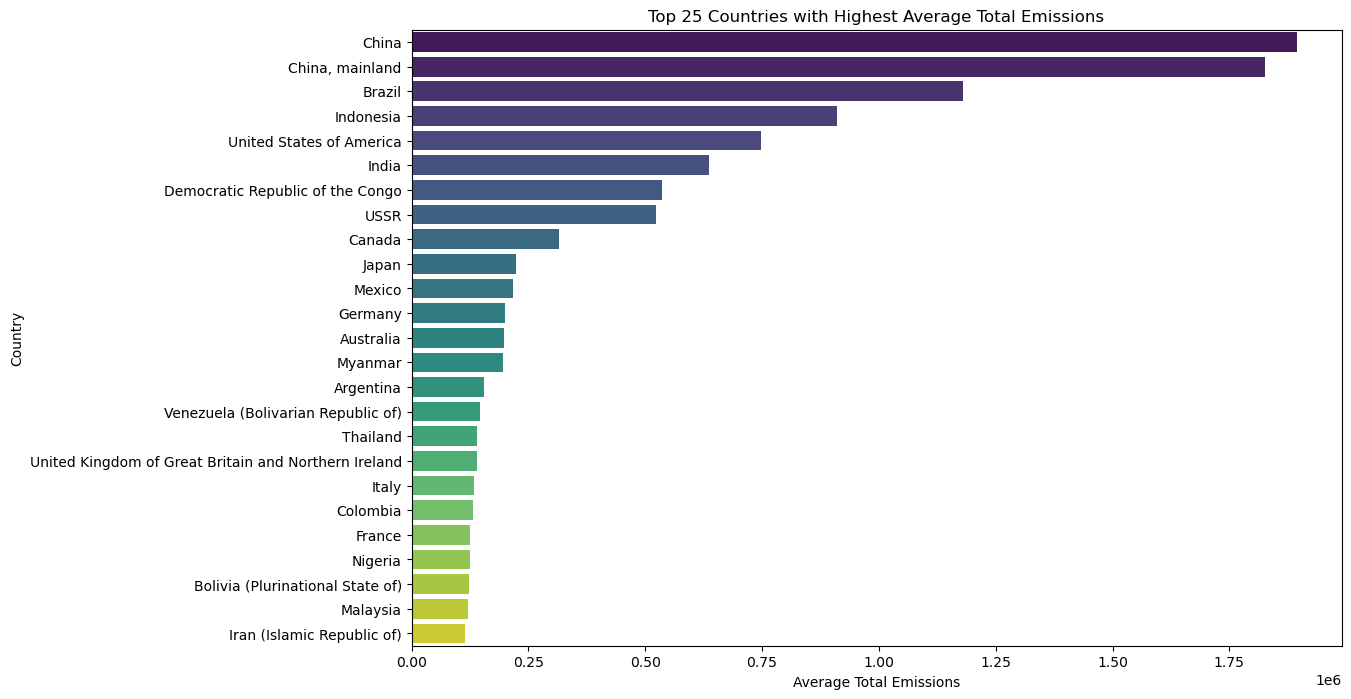

In [50]:
# Top 25 countries with highest average total emissions
avg_emissions = df.groupby('area')['total_emission'].mean().sort_values(ascending=False).head(25)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette='viridis')
plt.title('Top 25 Countries with Highest Average Total Emissions')
plt.xlabel('Average Total Emissions')
plt.ylabel('Country')
plt.show()

#Top 25 Countries by Average Emissions. Identify which countries contribute most to emissions on average

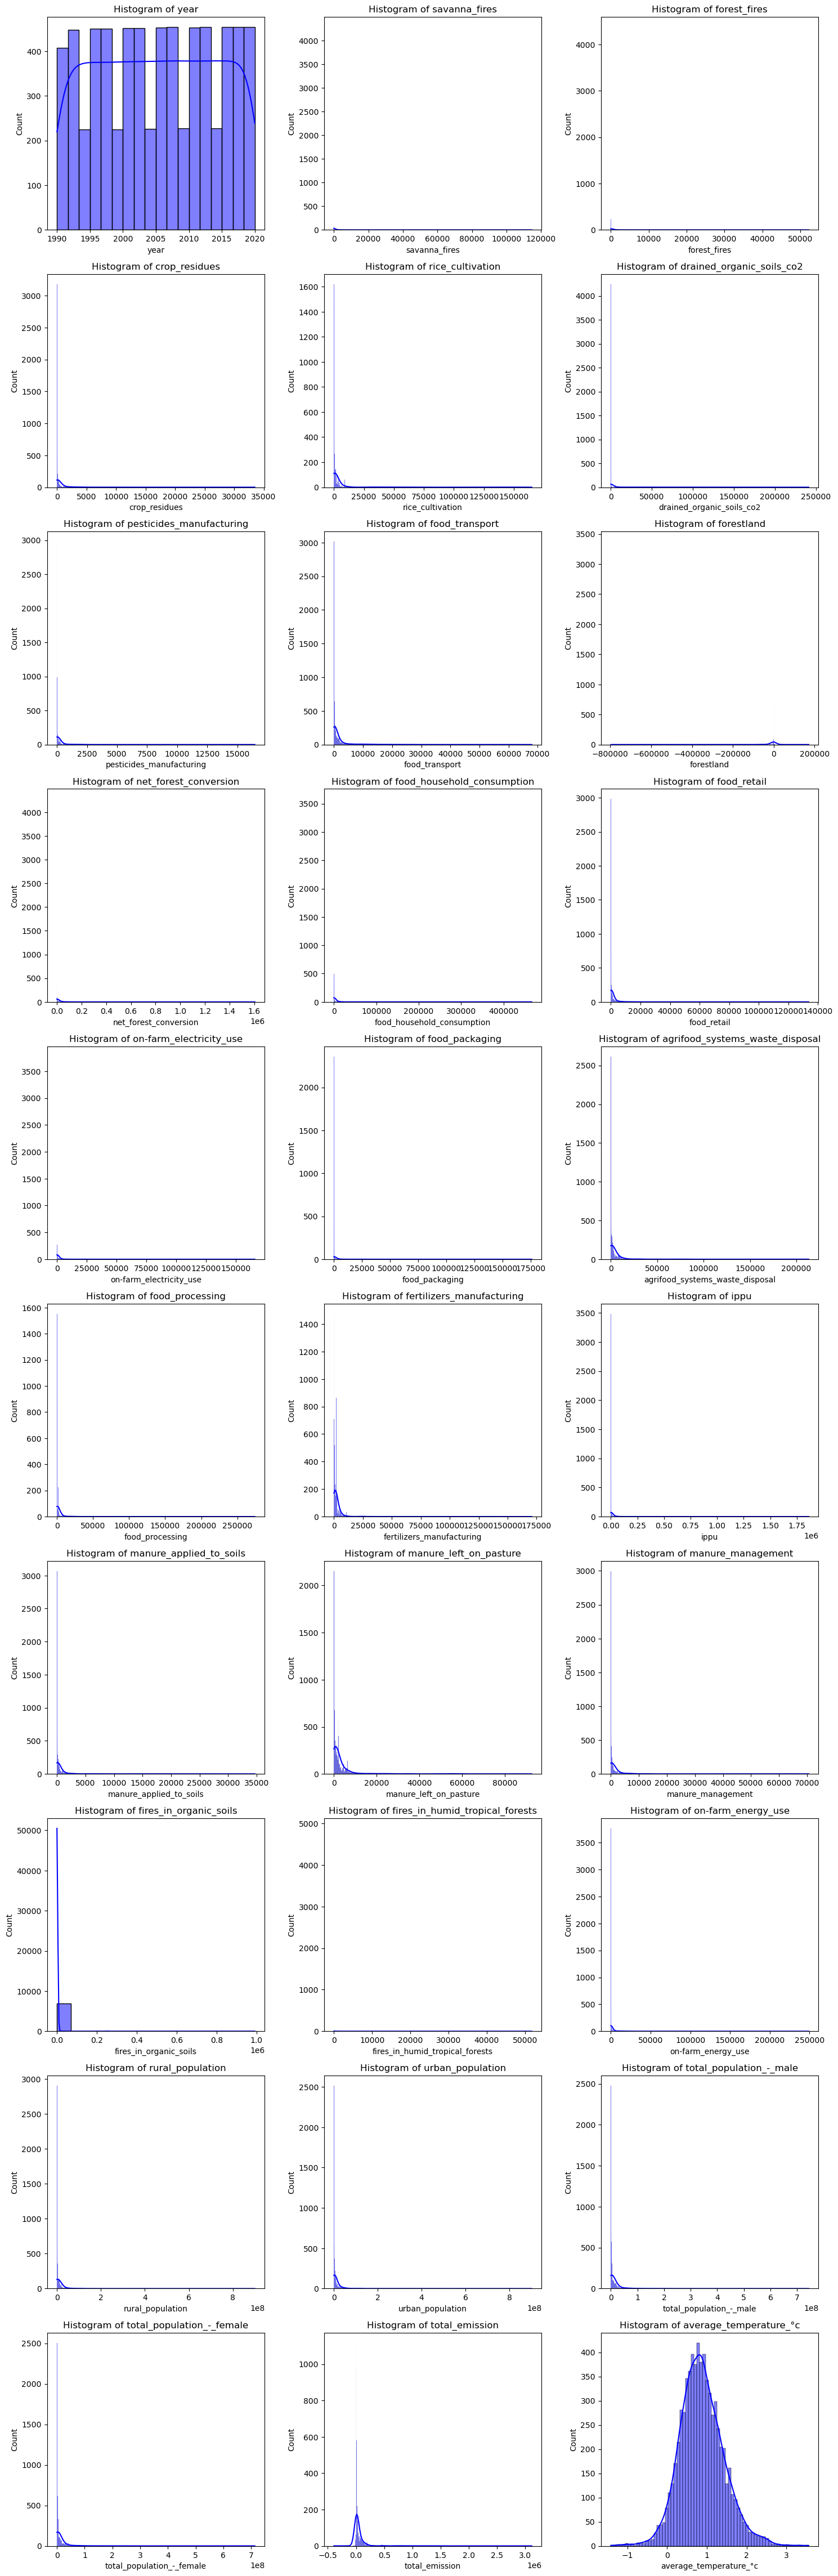

In [51]:
# Histograms for numerical columns

# Select numeric columns
numeric_columns = df.select_dtypes(include = "number").columns

plt.figure(figsize = (15, 50))
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde = True, color = 'blue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

#### Insights

*Savanna fires*: The distribution shows the frequency and intensity of savanna fires across different regions and years. 

*Forest fires*: Similar to savanna fires, this plot reveals the distribution of forest fire emissions, highlighting regions or years with higher occurrences.

*Rice Cultivation*: The plot for rice cultivation emissions shows how methane emissions are distributed, indicating common emission levels and outliers.

*Drained organic soils (CO2)*: This plot helps understand the distribution of CO2 emissions from drained organic soils, showing typical emission levels and variability.

*Forestland*: The distribution of forestland values, including negative values indicating deforestation, can be observed.

*Net Forest conversion*: This plot shows the changes in forest area due to deforestation and afforestation, highlighting regions with significant changes.

*Food Household Consumption*: The distribution of emissions from household food consumption, indicating common levels and variability. total_emission: This plot provides an overall view of total emissions, showing the distribution and identifying regions or years with exceptionally high or low emissions. 

*Average Temperature °C*: The distribution of average temperature increases, helping to understand the variability and common temperature changes across regions and years.

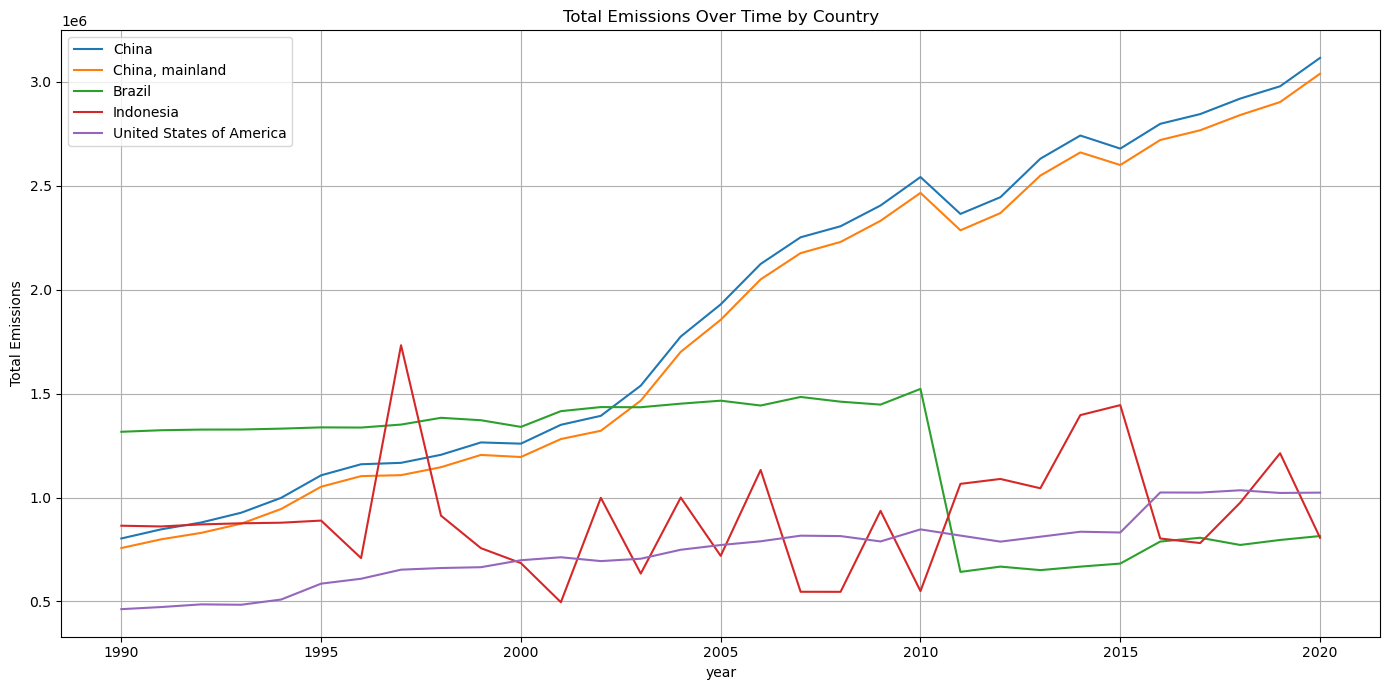

In [52]:
# Selected countries
selected_countries = ['China', 'China, mainland', 'Brazil', 'Indonesia', 'United States of America']

# Plot total emissions over time
plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df[df['area'] == country]
    plt.plot(country_data['year'], country_data['total_emission'], label=country)

plt.xlabel('year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Calculate the temperature change for each country
temperature_change = df.groupby('area')['average_temperature_°c'].agg(lambda x: x.max() - x.min()).reset_index()
temperature_change.rename(columns={'average_temperature_°c': 'temperature_change'}, inplace=True)

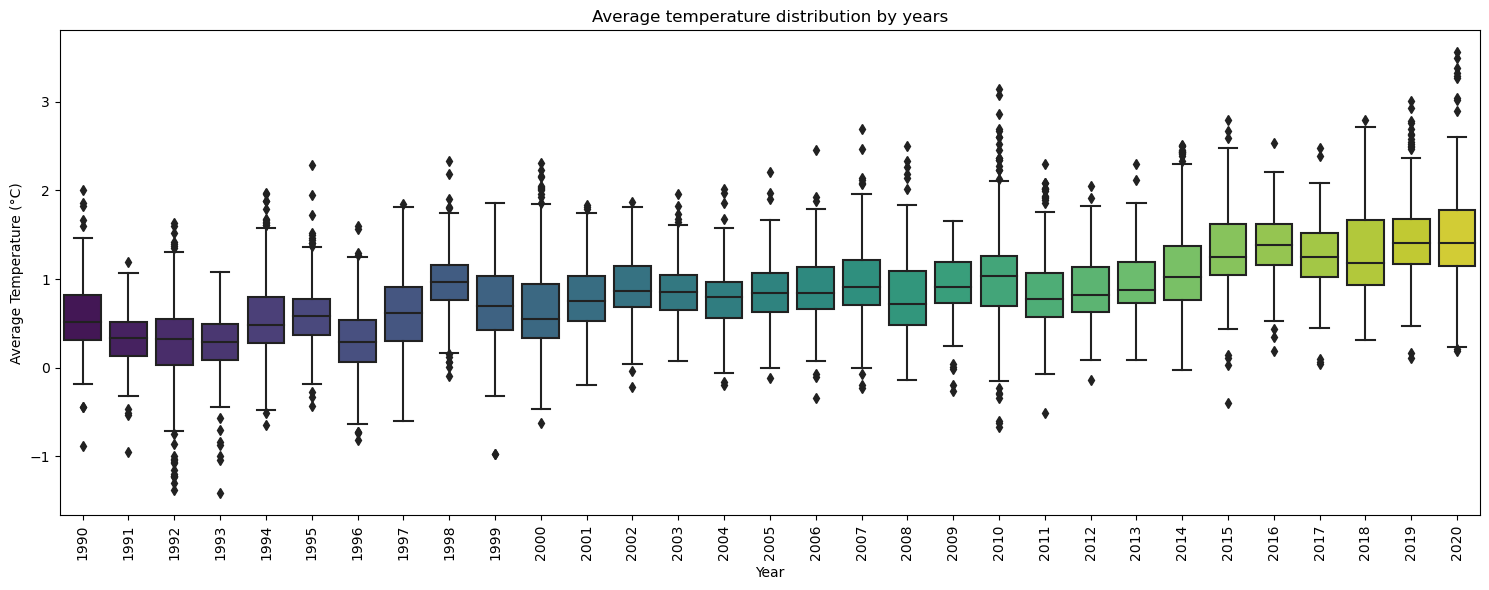

In [54]:
# Average temperature distribution over time
plt.figure(figsize = (15, 6))
sns.boxplot(x = "year", y = "average_temperature_°c", data = df, palette = "viridis")
plt.title('Average temperature distribution by years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 6: Exploratory Data Analysis (EDA) - Summary statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)


In [ ]:
# Cell 9: EDA - Identify patterns (Total Emissions vs. Average Temperature)
plt.figure(figsize=(12, 6))
plt.scatter(df['average_temperature_°c'], df['total_emission'], c='blue', label='Area')
plt.title('Total Emissions vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
print("Column names:")
print(df.columns)

In [ ]:
#Top Contributing Sectors to Emissions
sector_columns = [
    'Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
    'Forestland', 'Net Forest conversion', 'Food Household Consumption',
    'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
    'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
    'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management',
    'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use',
    'Rural Population', 'Urban Population', 'Total Population - Male',
    'Total Population - Female', 'Total Emission', 'Average Temperature (°C)'
]
total_emissions_by_sector = df[sector_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
total_emissions_by_sector.plot(kind='bar')
plt.title('Top Contributing Sectors to Emissions')
plt.xlabel('Sector')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#reveals the dominant sources of emissions, such as Manure Management, Rice Cultivation, or Food Processing.

In [ ]:
#Relationship Between Population and Emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total Population - Male', y='total_emission', label='Male Population')
sns.scatterplot(data=df, x='Total Population - Female', y='total_emission', label='Female Population')
plt.title('Relationship Between Population and Emissions')
plt.xlabel('Population')
plt.ylabel('Total Emissions')
plt.legend()
plt.grid(True)
plt.show()

#emissions are proportional to population or if some countries are more efficient

In [ ]:
# Generate correlation heatmap with smaller font sizes
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap of Numeric Features', fontsize=12)
plt.show()

#How total emissions and average temperature correlate with other variables like population, manure management, food transport, etc.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

Linear

In [ ]:
import pandas as pd
df = pd.read_csv('co2_emissions_from_agri.csv')


In [ ]:
X = df.drop(columns=['total_emission'])  # Features
y = df['total_emission']  # Target

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"RMSE: {rmse}, R²: {r2}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")

In [ ]:
# Drop non-numeric (categorical) columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Identify features highly correlated with the target
high_corr_features = correlation_matrix['total_emission'][correlation_matrix['total_emission'].abs() > 0.8].sort_values(ascending=False)

# Display the results
print("Features highly correlated with 'total_emission':")
print(high_corr_features)

In [ ]:
# Load the dataset
df = pd.read_csv('co2_emissions_from_agri.csv')

# Drop features that are highly correlated with the target (correlation > 0.8)
features_to_drop = [
    'urban_population', 'agrifood_systems_waste_disposal', 'food_household_consumption',
    'ippu', 'manure_applied_to_soils', 'food_packaging', 'crop_residues',
    'total_population_-_female', 'total_population_-_male', 'fertilizers_manufacturing',
    'food_processing', 'manure_management'
]
df = df.drop(columns=features_to_drop)

# Define features and target
X = df.drop(columns=['total_emission'])
y = df['total_emission']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Model - RMSE: {rmse_linear}, R²: {r2_linear}")


In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_co2_emissions_from_agri.csv')

# Use a single feature for visualization
feature = 'average_temperature_°c'
X = df[[feature]]
y = df['total_emission']

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best-fit line')
plt.xlabel(feature)
plt.ylabel('Total Emission')
plt.title('Linear Regression: Total Emission vs. Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

Lasso

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_name = "co2_emissions_from_agri.csv"
df = pd.read_csv(file_name)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert all columns to numeric where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric and irrelevant columns
df = df.drop(columns=['area', 'year'])

# Fill missing values with 0
df = df.fillna(0)

# Define features and target
target = 'total_emission'
X = df.drop(columns=[target])
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Lasso model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Display feature coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
non_zero_coefficients = coefficients[coefficients != 0]

# Plot the non-zero coefficients
plt.figure(figsize=(10, 8))
non_zero_coefficients.sort_values().plot(kind='barh')
plt.title('Lasso Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming you have a model and predictions
residuals = observed_values - predicted_values

In [ ]:
# The plot shows the residuals on the y-axis and the predicted values on the x-axis. 
# The red dashed line represents the zero residual line. 
# Ideally, the residuals should be randomly scattered around this line, indicating a good fit of the model.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'co2_emissions_from_agri.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Assuming 'total_emission' as observed values and 'Average Temperature °C' as predicted values for demonstration
data['Observed'] = data['total_emission']
data['Predicted'] = data['Average Temperature °C']

# Calculate the residuals (observed - predicted)
data['Residual'] = data['Observed'] - data['Predicted']

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Predicted'], data['Residual'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



In [ ]:
# 1. Check for Patterns: In a good model, residuals should be randomly distributed around zero. 
# Patterns or trends in the residual plot indicate potential issues with the model.

# 2. Normality of Residuals: Check if residuals are normally distributed using a histogram or a Q-Q plot.

import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
# Decision Tree Regression Example: to test your data and perform residual analysis.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Load the data from the CSV file
file_path = 'co2_emissions_from_agri.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Define the predictor (independent) variable and the response (dependent) variable
X = data[['Year']]  # Predictor variable
y = data['total_emission']  # Response variable

# Create and fit the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X, y)

# Predict the values using the model
predicted_values = model.predict(X)

# Calculate the residuals (differences between observed and predicted values)
residuals = y - predicted_values

# Create a residual plot to visualize the residuals
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Print the observed values, predicted values, and residuals for verification
observed_predicted_residuals = pd.DataFrame({
    'Year': data['Year'],
    'Observed Values': y,
    'Predicted Values': predicted_values,
    'Residuals': residuals
})

print(observed_predicted_residuals.head())



### Random Forest Regressor

In [ ]:
df.head()

In [ ]:
# Extract features and target variable

y = df['average_temperature_°c']
x = df.drop(columns = ['average_temperature_°c', 'Area'], axis = 1)

In [ ]:
# Create scaler object

scaler = StandardScaler()

In [ ]:
# Create scaled version of the predictors

x_scaled = scaler.fit_transform(x)

In [ ]:
# Convert the scaled predictor values into a DataFrame

x_standardised = pd.DataFrame(x_scaled, columns = x.columns)
x_standardised.head()

In [ ]:
# Define the reduced set of independent variables
x_reduced = x_standardised[['Year', 'Net Forest conversion', 'On-farm energy use', 'Manure Management',
                            'Drained organic soils (CO2)', 'Fertilizers Manufacturing', 'Rural population',
                            'Food Transport', 'Manure left on Pasture', 'Manure applied to Soils',
                            'Rice Cultivation', 'On-farm energy use', 'Crop Residues']]

In [ ]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# Train the model
model_rf = RandomForestRegressor(random_state = 42).fit(x_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(x_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
# print model results

print(f'MAE: {mae_rf} \nRMSE: {rmse_rf} \nR²: {r2_rf}')

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Create subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# 1. Actual vs Predicted Values
sns.scatterplot(x = y_test, y = y_pred_rf, ax = axes[0], color = 'blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')   
axes[0].set_title('Actual vs Predicted')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# 2. Residual Plot
sns.scatterplot(x = y_pred_rf, y = residuals, ax = axes[1], color = 'blue')
axes[1].axhline(0, color = 'red', linestyle = '--')
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot
stats.probplot(residuals, dist = "norm", plot = axes[2])
axes[2].set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()
plt.show()

---
<a href=#nine></a>
## **Conclusion**
<a href=#cont>Back to Table of Contents</a>